In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection

In [3]:
dfhr = pd.read_csv(r'C:\Users\Carrie Minerich\Desktop\bike\hour.csv')

instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [11]:
dfhr.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [12]:
dfhr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
dfhr.shape

(17379, 17)

In [7]:
dfhr.size

295443

**rename columns so it's easier to read**

In [13]:
dfhr.rename(columns={'weathersit':'weather',
                     'mnth':'month',
                     'hr':'hour',
                     'hum': 'humidity',
                     'cnt':'count'},inplace=True)

**Although month, hour, holiday, weekday, workingday, weather is entered as numerical, these columns are actually categorical and are represented as numerical for ease of analysis. Change datatype to categorical**

In [18]:
dfhr['season'] = dfhr.season.astype('category')
dfhr['month'] = dfhr.month.astype('category')
dfhr['hour'] = dfhr.hour.astype('category')
dfhr['holiday'] = dfhr.holiday.astype('category')
dfhr['weekday'] = dfhr.weekday.astype('category')
dfhr['workingday'] = dfhr.workingday.astype('category')
dfhr['weather'] = dfhr.weather.astype('category')


season month hour holiday weekday workingday weather  temp   atemp  \
0          1     1    0       0       6          0       1  0.24  0.2879   
1          1     1    1       0       6          0       1  0.22  0.2727   
2          1     1    2       0       6          0       1  0.22  0.2727   
3          1     1    3       0       6          0       1  0.24  0.2879   
4          1     1    4       0       6          0       1  0.24  0.2879   
5          1     1    5       0       6          0       2  0.24  0.2576   
6          1     1    6       0       6          0       1  0.22  0.2727   
7          1     1    7       0       6          0       1  0.20  0.2576   
8          1     1    8       0       6          0       1  0.24  0.2879   
9          1     1    9       0       6          0       1  0.32  0.3485   
10         1     1   10       0       6          0       1  0.38  0.3939   
11         1     1   11       0       6          0       1  0.36  0.3333   
12         1     1   12       0       6          0       1  0.42  0.4242   
13         1     1   13       0       6          0       2  0.46  0.4545   
14         1     1   14       0       6          0       2  0.46  0.4545   
15         1     1   15       0       6          0       2  0.44  0.4394   
16         1     1   16       0       6          0       2  0.42  0.4242   
17         1     1   17       0       6          0       2  0.44  0.4394   
18         1     1   18       0       6          0       3  0.42  0.4242   
19         1     1   19       0       6          0       3  0.42  0.4242   
20         1     1   20       0       6          0       2  0.40  0.4091   
21         1     1   21       0       6          0       2  0.40  0.4091   
22         1     1   22       0       6          0       2  0.40  0.4091   
23         1     1   23       0       6          0       2  0.46  0.4545   
24         1     1    0       0       0          0       2  0.46  0.4545   
25         1     1    1       0       0          0       2  0.44  0.4394   
26         1     1    2       0       0          0       2  0.42  0.4242   
27         1     1    3       0       0          0       2  0.46  0.4545   
28         1     1    4       0       0          0       2  0.46  0.4545   
29         1     1    6       0       0          0       3  0.42  0.4242   
...      ...   ...  ...     ...     ...        ...     ...   ...     ...   
17349      1    12   18       0       0          0       2  0.24  0.2121   
17350      1    12   19       0       0          0       1  0.34  0.3636   
17351      1    12   20       0       0          0       1  0.22  0.1970   
17352      1    12   21       0       0          0       1  0.20  0.2121   
17353      1    12   22       0       0          0       1  0.20  0.1970   
17354      1    12   23       0       0          0       1  0.20  0.1970   
17355      1    12    0       0       1          1       1  0.18  0.1818   
17356      1    12    1       0       1          1       1  0.18  0.1818   
17357      1    12    2       0       1          1       1  0.16  0.1667   
17358      1    12    3       0       1          1       1  0.16  0.1818   
17359      1    12    4       0       1          1       1  0.14  0.1667   
17360      1    12    5       0       1          1       1  0.16  0.1515   
17361      1    12    6       0       1          1       1  0.16  0.1667   
17362      1    12    7       0       1          1       1  0.16  0.1818   
17363      1    12    8       0       1          1       1  0.14  0.1515   
17364      1    12    9       0       1          1       2  0.18  0.2121   
17365      1    12   10       0       1          1       2  0.20  0.2121   
17366      1    12   11       0       1          1       2  0.22  0.2273   
17367      1    12   12       0       1          1       2  0.24  0.2273   
17368      1    12   13       0       1          1       2  0.26  0.2576   
17369      1    12   14       0       1          1    

**don't need instant and year columns. dteday is an object and data set includes month, keep the analysis a little more coarse. Must rename dataframe so changes take effect and it does not revert to previous data structure**

In [22]:
df = dfhr.drop(columns = ['instant', 'dteday', 'yr'], axis=1)

In [23]:
df.dtypes

season        category
month         category
hour          category
holiday       category
weekday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000186C368C278>,
      dtype=object)

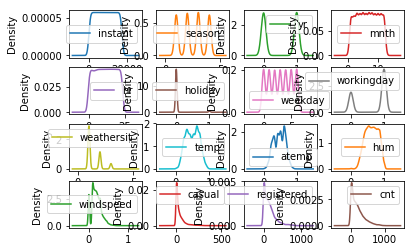

In [24]:
dfhr.plot(kind='density', subplots=True, layout=(4,4), sharex=False)


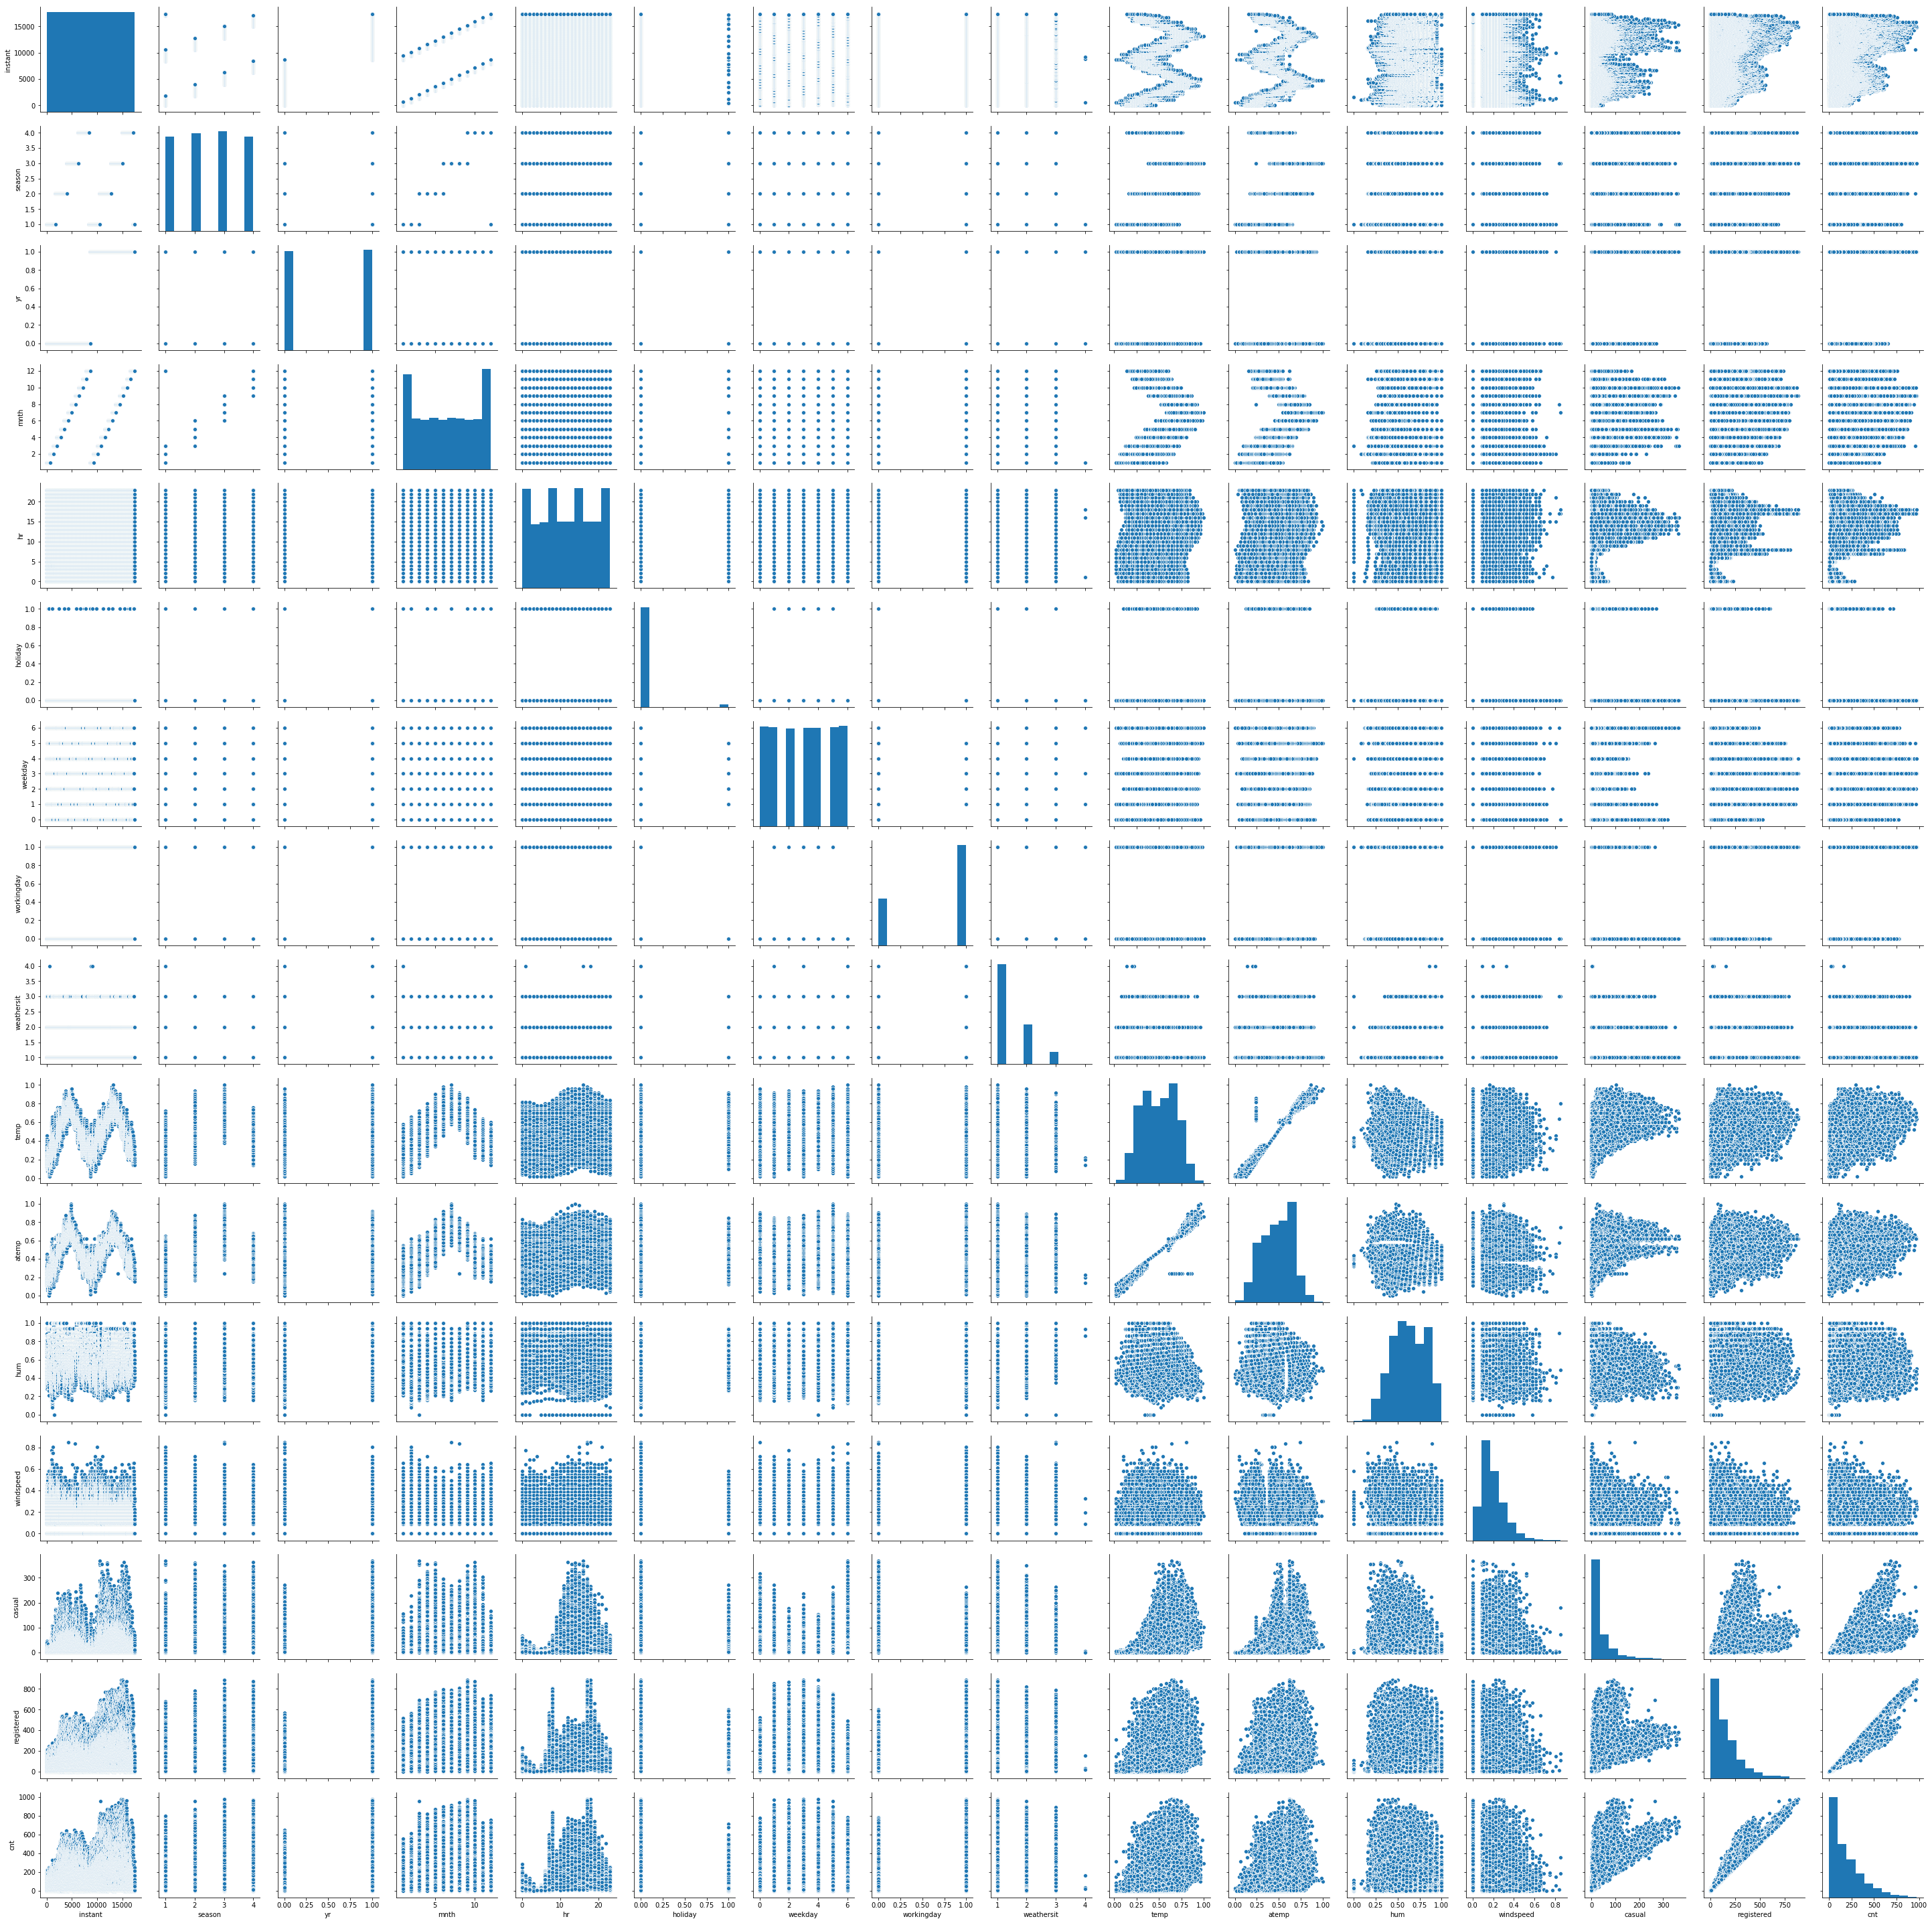

In [4]:
sns.pairplot(dfhr)

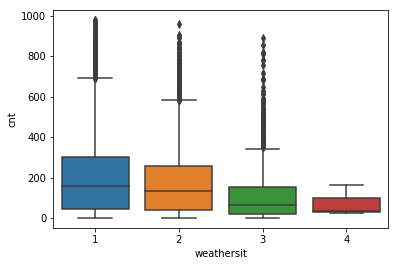

In [9]:
sns.boxplot(dfhr['weathersit'], dfhr['cnt'])

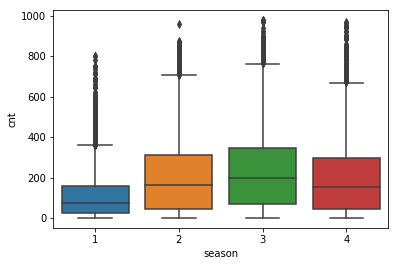

In [10]:
sns.boxplot(dfhr['season'], dfhr['cnt'])

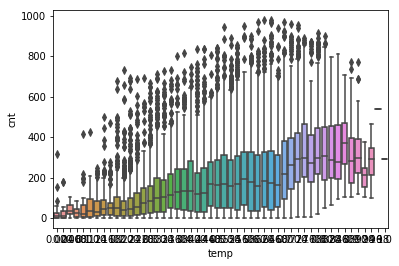

In [11]:
sns.boxplot(dfhr['temp'], dfhr['cnt'])

How do the temperatures change across the seasons? What are the mean and median temperatures?

Is there a correlation between the temp/atemp/mean.temp.atemp and the total count of bike rentals?

Is there a difference between the real temperature and the feeled temperature? If there is a difference will it still be there across the different seasons?

Is temperature associated with bike rentals (registered vs. casual)?

Can the number of total bike rentals be predicted by holiday and weather?

What are the mean temperature, humidity, windspeed and total rentals per months?

What percentage of days are appropriate for biking concerning the weather with conditions
Temperature > 5°, weather situation 1-3, windspeed < 40 km/h and
Temperature > 10°, weather situation 1-2, windspeed < 20 km/h?

In [1]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 